idx:574
0.33118864435416


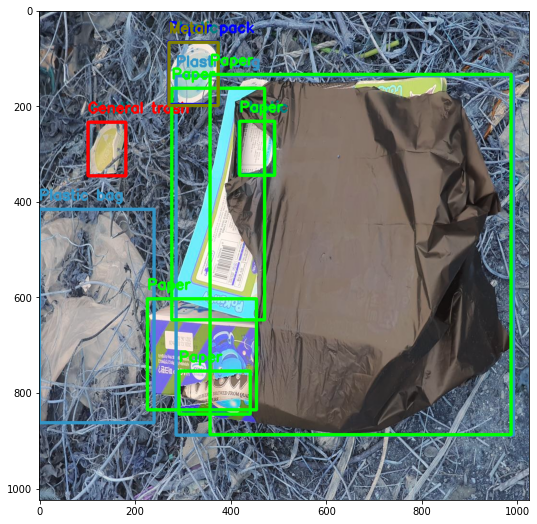

In [121]:
import numpy as np
import pandas as pd
import cv2
import os
import random
import matplotlib.pyplot as plt

# class 별 bbox 색
colors = [
    (255, 0, 0), 
    (0, 255, 0),
    (0, 0, 255),
    (127, 127, 0),
    (127, 0, 127),
    (0, 127, 127),
    (200, 200, 200),
    (50, 150, 200),
    (200, 155, 50),
    (130, 198, 20),
]
labels = {0: 'General trash', 1: 'Paper', 2: 'Paper pack', 3: 'Metal', 4: 'Glass', 5: 'Plastic', 6: 'Styrofoam', 7: 'Plastic bag', 8: 'Battery', 9: 'Clothing'}

# 이미지 경로
img_dir = '../../dataset'
# output 파일 경로
output_dir = './work_dirs/base/submission_latest.csv'
output_dir = './work_dirs/aug_set1_adamW/submission_epoch_70.csv'
# output_dir = './work_dirs/aug_set1_nasfpn/submission_nasfpn70.csv'
# output_dir = './work_dirs/aug_set1_nasfpn/submission_nasfpn84.csv'
# output_dir = './work_dirs/aug_set1_nasfpn/submission_nasfpn96.csv'
output_dir = './best_output.csv'
output_dir = './work_dirs/aug_set2_fpncarafe_4Conv1FcHead/submission_epoch_50.csv'
# output_dir = './final_output_nmw.csv'
output_dir = './final_output_all.csv'
test_result = pd.read_csv(output_dir)

file_names = test_result['image_id'].values.tolist()
bboxes = test_result['PredictionString'].values.tolist()

idx = random.choice(range(len(file_names)))
# idx =2256
file_name = file_names[idx]
bbox = bboxes[idx].split()

image = cv2.imread(os.path.join(img_dir, file_name)).astype(np.uint8)
test_score = 0
test_n = 0
for i in range(0, len(bbox), 6):
    label = int(bbox[i])
    x_min = int(bbox[i + 2].split('.')[0])
    y_min = int(bbox[i + 3].split('.')[0])
    x_max = int(bbox[i + 4].split('.')[0])
    y_max = int(bbox[i + 5].split('.')[0])
    if float(bbox[i+1])>0.2:
    # bounding box 그리기
        image = cv2.rectangle(image, pt1=(x_min, y_min), pt2=(x_max, y_max), color=colors[label], thickness=5)
        # # label text 넣기
        cv2.putText(image, labels[label], (x_min, y_min - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, colors[label], 3)
        test_score+=float(bbox[i+1])
        test_n+=1
print(f'idx:{idx}')
if test_n!=0:
    print(test_score/test_n)    
plt.figure(figsize=(9,9))
plt.imshow(image)

In [59]:
idx=0